In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('survey_results.csv')

In [3]:
print(df.shape)
df.head()

(30010, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


<h1 align='center'>Cleaning Data<h1>

### 1 / Check duplicated

In [4]:
# 1 / Check duplicated
df.duplicated().sum()

10

In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(30000, 17)

### 2/  Check outliers from age column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30000 non-null  object
 1   age                             30000 non-null  int64 
 2   gender                          30000 non-null  object
 3   zone                            30000 non-null  object
 4   occupation                      30000 non-null  object
 5   income_levels                   21939 non-null  object
 6   consume_frequency(weekly)       29992 non-null  object
 7   current_brand                   30000 non-null  object
 8   preferable_consumption_size     30000 non-null  object
 9   awareness_of_other_brands       30000 non-null  object
 10  reasons_for_choosing_brands     30000 non-null  object
 11  flavor_preference               30000 non-null  object
 12  purchase_channel                29990 non-null  obj

In [9]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


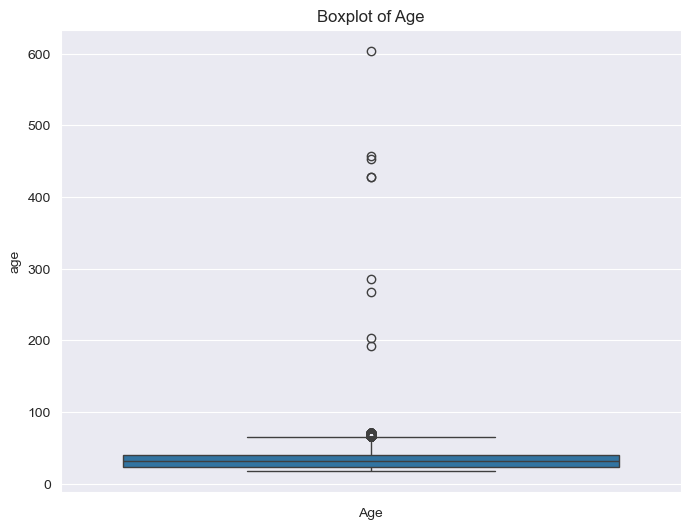

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [11]:
print(df[df['age'] > 100].shape)
df[df['age'] > 100]


(9, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


In [12]:
df[df['age'] > 100]['age'].max()

604

In [13]:
# Drop age which greater than 100
df = df[df['age'] < 100]

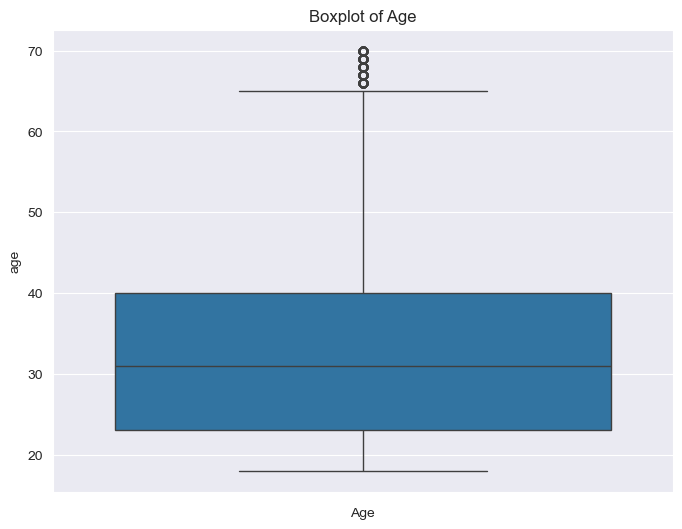

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [15]:
df.shape

(29991, 17)

### 3 / How many null values are present in the consume_frequency(weekly) column? What is the mode value used to fill these null values?


In [16]:
df.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250


In [17]:
# Null value in consume_frequency
df['consume_frequency(weekly)'].isna().sum()

8

In [18]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11786
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [19]:
df['consume_frequency(weekly)'].mode()

0    3-4 times
Name: consume_frequency(weekly), dtype: object

* We will use mode 3-4 times to fill N/A values for consume_frequency

In [20]:
df['consume_frequency(weekly)']=df['consume_frequency(weekly)'].fillna('3-4 times')

In [21]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11794
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [22]:
df['consume_frequency(weekly)'].isna().sum()

0

In [23]:
df.shape

(29991, 17)

In [24]:
df.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            0
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [25]:
# Check N/A income_levels

In [26]:
df[df['income_levels'].isna()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100
5,R00006,22,F,Urban,Student,NaN,5-7 times,Established,Large (1 L),2 to 4,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",100-150
11,R00012,23,F,Urban,Student,NaN,0-2 times,Established,Small (250 ml),0 to 1,Price,Exotic,Retail Store,Premium,Low (Not very concerned),Social (eg. Parties),50-100
14,R00015,22,M,Metro,Student,NaN,3-4 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
20,R00021,23,M,Semi-Urban,Student,NaN,3-4 times,Newcomer,Large (1 L),0 to 1,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R29986,24,F,Metro,Student,NaN,5-7 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150
29996,R29987,22,M,Urban,Student,NaN,0-2 times,Established,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),Social (eg. Parties),50-100
29999,R29990,23,F,Metro,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
30002,R29993,18,M,Metro,Student,NaN,0-2 times,Established,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150


In [27]:
df['income_levels'].value_counts()

income_levels
16L - 25L    5897
10L - 15L    5251
<10L         4661
26L - 35L    3872
> 35L        2250
Name: count, dtype: int64

In [28]:
df['income_levels'].fillna('Not Reported', inplace=True)

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_74676/1816725272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_levels'].fillna('Not Reported', inplace=True)


In [29]:
df.isnull().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          0
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

In [30]:
#Check purchase_channel
df['purchase_channel'].value_counts()

purchase_channel
Online          16562
Retail Store    13419
Name: count, dtype: int64

In [31]:
df['purchase_channel'].mode()

0    Online
Name: purchase_channel, dtype: object

In [32]:
df['purchase_channel'] =df['purchase_channel'].fillna('Online')

In [33]:
df.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

In [34]:
df.shape

(29991, 17)

### 4 / Correct spelling

In [35]:
df.columns

Index(['respondent_id', 'age', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range'],
      dtype='object')

In [36]:
for col in df.select_dtypes('object').columns:
    print(f"{col} --> {df[col].unique()}")

respondent_id --> ['R00001' 'R00002' 'R00003' ... 'R29998' 'R29999' 'R30000']
gender --> ['M' 'F']
zone --> ['Urban' 'Metro' 'Rural' 'Semi-Urban' 'Metor' 'urbna']
occupation --> ['Working Professional' 'Student' 'Entrepreneur' 'Retired']
income_levels --> ['<10L' '> 35L' '16L - 25L' 'Not Reported' '10L - 15L' '26L - 35L']
consume_frequency(weekly) --> ['3-4 times' '5-7 times' '0-2 times']
current_brand --> ['Newcomer' 'Established' 'newcomer' 'Establishd']
preferable_consumption_size --> ['Medium (500 ml)' 'Large (1 L)' 'Small (250 ml)']
awareness_of_other_brands --> ['0 to 1' '2 to 4' 'above 4']
reasons_for_choosing_brands --> ['Price' 'Quality' 'Availability' 'Brand Reputation']
flavor_preference --> ['Traditional' 'Exotic']
purchase_channel --> ['Online' 'Retail Store']
packaging_preference --> ['Simple' 'Premium' 'Eco-Friendly']
health_concerns --> ['Medium (Moderately health-conscious)' 'Low (Not very concerned)'
 'High (Very health-conscious)']
typical_consumption_situations --> 

In [37]:
df['zone'] = df['zone'].replace('urbna', 'Urban')
df['zone'] = df['zone'].replace('Metor', 'Metro')
df['current_brand'] = df['current_brand'].replace('Establishd', 'Established')
df['current_brand'] = df['current_brand'].replace('newcomer', 'Newcomer')


In [38]:
df['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

In [39]:
print(df[df['zone'] == 'Metor'].shape)
df[df['zone'] == 'Metor']

(0, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range


In [40]:
df['zone'] = df['zone'].replace('Metor', 'Metro')

In [41]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [ ]:
# Drop unimportant columns
df.drop(['respondent_id'])

<h1 align = 'center'>Feature Engineering<h1>

* Step 1:
* Categorize Age into Age Groups
* Objective: Create a new column `age_group` by categorizing the existing `age`
column into specific age ranges.
* ● Categorize ages into the following groups:
* ○ 18-25 ○ 26-35 ○ 36-45 ○ 46-55 ○ 56-70 ○ 70+
* ● Ensure that each age in the dataset is mapped to one of these age groups.
* ● After that, remove the original `age` column from the dataset.

In [42]:
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [43]:
def categorize_age_group(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 70:
        return '56-70'
    elif age > 70:
        return '70+'
    else:
        return None

In [44]:
df['age_group'] = df['age'].apply(categorize_age_group)
df.drop('age', axis=1, inplace=True)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [45]:
# Step 2: Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)
# Objective: Create a new column `cf_ab_score` by combining the information from `consume_frequency(weekly)` and `awareness_of_other_brands` columns.
# ● Use the following mappings for consume_frequency(weekly):
# ○ "0-2 times" → 1
# ○ "3-4 times" → 2
# ○ "5-7 times" → 3
# ● Use the following mappings for awareness_of_other_brands:
# ○ "0to1"→1
# ○ "2to4"→2
# ○ "above 4" → 3
# ● Calculate cf_ab_score using the following formula:
# cf_ab_score = (consume_frequency) / (consume_frequency + awareness_of_other_brands)


In [46]:
df['consume_frequency(weekly)'].unique()

array(['3-4 times', '5-7 times', '0-2 times'], dtype=object)

In [47]:
df['awareness_of_other_brands'].unique()

array(['0 to 1', '2 to 4', 'above 4'], dtype=object)

In [48]:
df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].map({'0-2 times': 1, '3-4 times': 2, '5-7 times': 3})
df['awareness_of_other_brands'] = df['awareness_of_other_brands'].map({'0 to 1' : 1, '2 to 4' : 2, 'above 4' : 3})
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [49]:
df['cf_ab_score'] = (df['consume_frequency(weekly)'] / (df['consume_frequency(weekly)'] + df['awareness_of_other_brands'])).round(2)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,Not Reported,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


In [50]:
df['cf_ab_score'].max()

0.75

In [51]:
# Step 3: Create Zone Affluence Score (ZAS)
# Objective: Calculate the `zas_score` using a combination of the `zone` and
# `income_levels` columns.
# ● Use the following mappings for the zone column:
# ○ "Urban" → 3
# ○ "Metro" → 4
# ○ "Rural" → 1
# ○ "Semi-Urban" → 2
# ● Use the following mappings for the income_levels column:
# ○ "<10L" → 1
# ○ "10L-15L"→2
# ○ "16L-25L"→3
# ○ "26L-35L"→4
# ○ ">35L"→5
# ○ "Not Reported" → 0
# ● Calculate the zas_score using the following formula:
# zas_score = zone_score * income_score

In [52]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [53]:
df['income_levels'].unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

In [54]:
def strip_income_leve(text):
    return text.replace(' ', '')

strip_income_leve('> 35L')

'>35L'

In [55]:
df['income_levels'] = df['income_levels'].apply(strip_income_leve)

In [56]:
df['income_levels'].unique()

array(['<10L', '>35L', '16L-25L', 'NotReported', '10L-15L', '26L-35L'],
      dtype=object)

In [57]:
df['zone'] = df['zone'].map({"Rural" :1, "Urban" :3, "Semi-Urban" :2, "Metro" :4})
df['income_levels'] = df['income_levels'].map({"<10L": 1, "10L-15L":2, "16L-25L":3, "26L-35L":4, ">35L":5, "NotReported":0})
df['zas_score'] = df['zone'] * df['income_levels']
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [58]:
df['zas_score'].nunique()

14

In [59]:
# Step 4: Brand Switching Indicator (BSI)
# Objective: Create a binary indicator column `bsi` that identifies if a respondent is likely to switch brands.
# ● Check if the respondent’s current_brand is not "Established".
# ● Also check if the reasons_for_choosing_brands are either "Price" or
# "Quality".
# ● If both conditions are true, assign a value of 1 to indicate potential for brand
# switching. Otherwise, assign 0.

In [60]:
df['bsi'] = ((df['current_brand'] != 'Established') & (df['reasons_for_choosing_brands'].isin(['Price', 'Quality']))).astype(int)
df.sample(25)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
2649,R02649,M,4,Student,0,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,18-25,0.50,0,0
27500,R27491,F,4,Retired,2,2,Newcomer,Medium (500 ml),1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200,56-70,0.67,8,1
12095,R12090,F,2,Working Professional,4,2,Established,Medium (500 ml),1,Quality,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),200-250,26-35,0.67,8,0
21350,R21344,F,3,Working Professional,3,1,Established,Medium (500 ml),2,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Casual (eg. At home),150-200,26-35,0.33,9,0
24209,R24201,M,4,Entrepreneur,3,2,Established,Large (1 L),3,Quality,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,26-35,0.40,12,0
13593,R13588,M,2,Working Professional,4,1,Established,Medium (500 ml),1,Brand Reputation,Exotic,Online,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,8,0
1344,R01345,M,3,Entrepreneur,1,2,Established,Small (250 ml),2,Price,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",200-250,46-55,0.50,3,0
25440,R25431,M,3,Entrepreneur,1,2,Newcomer,Large (1 L),2,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200,36-45,0.50,3,1
2318,R02318,M,4,Student,0,3,Established,Medium (500 ml),1,Price,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",100-150,18-25,0.75,0,0
26891,R26882,M,4,Working Professional,2,2,Established,Medium (500 ml),2,Availability,Traditional,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200,26-35,0.50,8,0


In [61]:
df['current_brand'].dtype, df['reasons_for_choosing_brands'].dtype

(dtype('O'), dtype('O'))

In [62]:
df['current_brand'].isna().sum(), df['reasons_for_choosing_brands'].isna().sum()

(0, 0)

In [63]:
df['bsi'].isna().sum()

0

### Final Cleaning Step:
#### Removing Logical Outliers:

In [64]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [65]:
df.groupby('age_group')['occupation'].value_counts()

age_group  occupation          
18-25      Student                 7328
           Working Professional    2605
           Entrepreneur             535
26-35      Working Professional    6570
           Entrepreneur            1826
           Student                  697
36-45      Working Professional    4353
           Entrepreneur            1619
46-55      Working Professional    2167
           Entrepreneur             799
56-70      Retired                 1130
           Entrepreneur             221
           Working Professional     106
           Student                   35
Name: count, dtype: int64

In [66]:
df[(df['age_group'] == '18-25') & (df['occupation']=='Entrepreneur')]

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
25,R00026,F,4,Entrepreneur,4,3,Established,Large (1 L),3,Quality,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,18-25,0.50,16,0
58,R00059,F,3,Entrepreneur,3,2,Established,Medium (500 ml),1,Quality,Traditional,Online,Eco-Friendly,Low (Not very concerned),Social (eg. Parties),150-200,18-25,0.67,9,0
81,R00082,M,4,Entrepreneur,2,2,Established,Medium (500 ml),3,Price,Traditional,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",200-250,18-25,0.40,8,0
113,R00114,F,3,Entrepreneur,3,3,Established,Medium (500 ml),3,Quality,Traditional,Retail Store,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,18-25,0.50,9,0
159,R00160,M,1,Entrepreneur,2,1,Newcomer,Small (250 ml),3,Price,Traditional,Online,Simple,Low (Not very concerned),Casual (eg. At home),100-150,18-25,0.25,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29777,R29768,M,3,Entrepreneur,2,1,Newcomer,Medium (500 ml),1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),100-150,18-25,0.50,6,1
29852,R29843,M,2,Entrepreneur,3,3,Established,Medium (500 ml),1,Brand Reputation,Traditional,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,18-25,0.75,6,0
29894,R29885,F,3,Entrepreneur,3,3,Newcomer,Medium (500 ml),2,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),200-250,18-25,0.60,9,0
29968,R29959,M,4,Entrepreneur,1,1,Established,Small (250 ml),1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),100-150,18-25,0.50,4,0


In [67]:
df = df[~((df['age_group'] == '56-70') & (df['occupation']=='Student'))]
print(df.shape)
df.head()

(29956, 20)


,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [68]:
df.groupby('age_group')['occupation'].value_counts()

age_group  occupation          
18-25      Student                 7328
           Working Professional    2605
           Entrepreneur             535
26-35      Working Professional    6570
           Entrepreneur            1826
           Student                  697
36-45      Working Professional    4353
           Entrepreneur            1619
46-55      Working Professional    2167
           Entrepreneur             799
56-70      Retired                 1130
           Entrepreneur             221
           Working Professional     106
Name: count, dtype: int64

In [69]:
df.shape

(29956, 20)

In [70]:
df['bsi'].value_counts()

bsi
0    20796
1     9160
Name: count, dtype: int64

<h2 align = 'center'>Working with modeling<h2>

### 1 / Prepare feature and target variables

In [71]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [72]:
X = df.drop(['respondent_id','price_range'], axis=1)
y = df['price_range']

In [73]:
print(X.shape)
X.head()

(29956, 18)


,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.67,3,1
1,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,20,0
2,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.50,5,0
3,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.75,9,0
4,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.67,0,0


In [74]:
y = y.map({'50-100':1,'100-150':2,'150-200':3,'200-250':4})

In [75]:
y.shape

(29956,)

### 2 / Data split

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [77]:
X.columns

Index(['gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'age_group', 'cf_ab_score',
       'zas_score', 'bsi'],
      dtype='object')

In [78]:
feature_list = ['age_group','income_levels','consume_frequency(weekly)','health_concerns','preferable_consumption_size']

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for feature in feature_list:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature])


In [80]:
X_train.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,2,Working Professional,2,0,Newcomer,2,3,Availability,Traditional,Online,Simple,1,Social (eg. Parties),0,0.25,4,0
26395,F,3,Working Professional,3,2,Established,1,2,Quality,Traditional,Online,Premium,2,Social (eg. Parties),0,0.60,9,0
11276,F,3,Student,0,1,Newcomer,2,2,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",0,0.50,0,1
9110,M,4,Working Professional,3,1,Established,0,2,Quality,Traditional,Online,Premium,1,"Active (eg. Sports, gym)",1,0.50,12,0
3373,M,4,Entrepreneur,3,0,Established,0,3,Brand Reputation,Traditional,Online,Eco-Friendly,2,Casual (eg. At home),1,0.25,12,0


In [81]:
X_test.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
11981,M,3,Student,0,2,Established,0,1,Price,Exotic,Online,Simple,2,Social (eg. Parties),0,0.75,0,0
1805,M,4,Working Professional,2,0,Newcomer,2,3,Price,Exotic,Online,Simple,0,"Active (eg. Sports, gym)",0,0.25,8,1
517,M,4,Working Professional,3,0,Established,1,3,Brand Reputation,Exotic,Retail Store,Premium,2,"Active (eg. Sports, gym)",1,0.25,12,0
3820,F,4,Working Professional,3,2,Newcomer,1,2,Quality,Traditional,Retail Store,Premium,2,"Active (eg. Sports, gym)",3,0.60,12,1
28625,M,4,Entrepreneur,4,2,Newcomer,1,1,Quality,Exotic,Online,Premium,0,Casual (eg. At home),2,0.75,16,1


In [82]:
X.select_dtypes('object').columns

Index(['gender', 'occupation', 'current_brand', 'preferable_consumption_size',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'age_group'],
      dtype='object')

In [83]:
list_categories = ['gender', 'occupation', 'current_brand', 'reasons_for_choosing_brands',
       'flavor_preference', 'purchase_channel', 'packaging_preference',
       'typical_consumption_situations']

In [84]:
X_train = pd.get_dummies(data=X_train, columns=list_categories, drop_first=True, dtype='int')
X_train.head()

,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age_group,cf_ab_score,zas_score,bsi,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
8391,2,2,0,2,3,1,0,0.25,4,0,...,1,0,0,0,1,0,0,1,0,1
26395,3,3,2,1,2,2,0,0.60,9,0,...,0,0,0,1,1,0,1,0,0,1
11276,3,0,1,2,2,2,0,0.50,0,1,...,1,0,1,0,1,0,0,1,0,0
9110,4,3,1,0,2,1,1,0.50,12,0,...,0,0,0,1,1,0,1,0,0,0
3373,4,3,0,0,3,2,1,0.25,12,0,...,0,1,0,0,1,0,0,0,1,0


In [85]:
X_test = pd.get_dummies(data=X_test, columns=list_categories, drop_first=True, dtype='int')
X_test.head()

,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age_group,cf_ab_score,zas_score,bsi,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
11981,3,0,2,0,1,2,0,0.75,0,0,...,0,0,1,0,0,0,0,1,0,1
1805,4,2,0,2,3,0,0,0.25,8,1,...,1,0,1,0,0,0,0,1,0,0
517,4,3,0,1,3,2,1,0.25,12,0,...,0,1,0,0,0,1,1,0,0,0
3820,4,3,2,1,2,2,3,0.60,12,1,...,1,0,0,1,1,1,1,0,0,0
28625,4,4,2,1,1,0,2,0.75,16,1,...,1,0,0,1,0,0,1,0,1,0


In [86]:
X_train.head()

,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age_group,cf_ab_score,zas_score,bsi,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
8391,2,2,0,2,3,1,0,0.25,4,0,...,1,0,0,0,1,0,0,1,0,1
26395,3,3,2,1,2,2,0,0.60,9,0,...,0,0,0,1,1,0,1,0,0,1
11276,3,0,1,2,2,2,0,0.50,0,1,...,1,0,1,0,1,0,0,1,0,0
9110,4,3,1,0,2,1,1,0.50,12,0,...,0,0,0,1,1,0,1,0,0,0
3373,4,3,0,0,3,2,1,0.25,12,0,...,0,1,0,0,1,0,0,0,1,0


In [87]:
y_train.head()

8391     1
26395    4
11276    2
9110     3
3373     3
Name: price_range, dtype: int64

In [88]:
y_train.unique()

array([1, 4, 2, 3])

In [89]:
print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)

(22467, 24)
(22467,)
(7489, 24)
(7489,)


(None, None, None, None)

<h1 align = 'center'>Traning Model<h1>

In [90]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
# Train with LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print(f"Mean squared error (LR): {mean_squared_error(y_test, y_pred_lr)}")
print(f"R2 score (LR): {r2_score(y_test, y_pred_lr)}")

Mean squared error (LR): 0.17943987134761916
R2 score (LR): 0.8266960098530076


In [92]:
# train with Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred_ls = model_lasso.predict(X_test)
print(f"mean squared error (Lasso): {mean_squared_error(y_test, y_pred_ls)}")
print(f"f2 score (Lasso): {r2_score(y_test, y_pred_ls)}")

mean squared error (Lasso): 0.45538540004915246
f2 score (Lasso): 0.5601863382396499


In [93]:
#train with SVM
model_svm = SVC()
model_svm.fit(X_train,y_train)
y_pred_svc = model_svm.predict(X_test)
print(f"mean squared error (SVM): {mean_squared_error(y_test, y_pred_svc)}")
print(f" F2 score (SVM): {r2_score(y_test, y_pred_svc)}")

mean squared error (SVM): 0.1870743757511016
 F2 score (SVM): 0.8193225645535783


In [94]:
#train with RandomForest
model_rdf = RandomForestRegressor()
model_rdf.fit(X_train,y_train)
y_pred_rdf = model_rdf.predict(X_test)
print(f"Mean squared error (RDF): {mean_squared_error(y_test, y_pred_rdf)}")
print(f"F2 score (RDF): {r2_score(y_test, y_pred_rdf)}")

Mean squared error (RDF): 0.06730149398362842
F2 score (RDF): 0.9349998561489085


In [95]:
# train with Gradient Boosting
model_gr = GradientBoostingRegressor()
model_gr.fit(X_train,y_train)
y_pred_gr = model_gr.predict(X_test)
print(f"Mean squared error : {mean_squared_error(y_test, y_pred_gr)}")
print(f"R2 score : {r2_score(y_test,y_pred_gr)}")

Mean squared error : 0.09864492306592171
R2 score : 0.9047282042353395


In [96]:
#train with xgboost
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(f"Mean squared : {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R2 Score : {r2_score(y_test, y_pred_xgb)}")

Mean squared : 0.07340738580515101
R2 Score : 0.9291027784347534


In [97]:
X.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.67,3,1
1,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,20,0
2,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.50,5,0
3,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.75,9,0
4,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.67,0,0


In [98]:
y.unique()

array([2, 4, 3, 1])

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=396)

# Preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic" : LogisticRegression(max_iter=1000),
    "GaussianNB" : GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Pipelines & Training
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred),
    r2  = r2_score(y_test, y_pred)
    print(f"{name} - Mean squared error: {mse}")
    print(f"{name} - R2 score: {r2}")
    print("*"*50)



Linear Regression - Mean squared error: (0.1473624126259121,)
Linear Regression - R2 score: 0.8618305750086444
**************************************************
Logistic - Mean squared error: (0.1557076101468625,)
Logistic - R2 score: 0.8540059803758455
**************************************************
GaussianNB - Mean squared error: (0.5936248331108144,)
GaussianNB - R2 score: 0.4434075800609675
**************************************************
SVM - Mean squared error: (0.12750333778371162,)
SVM - R2 score: 0.8804507706400279
**************************************************
Random Forest - Mean squared error: (0.06883886947551172,)
Random Forest - R2 score: 0.9354555422716121
**************************************************
Gradient Boosting - Mean squared error: (0.10082203628707528,)
Gradient Boosting - R2 score: 0.9054675983379411
**************************************************
XGBoost - Mean squared error: (0.07084917210778409,)
XGBoost - R2 score: 0.9335706233978271
*

In [100]:
max_random_state = [396,392]

In [101]:
# score = []
# for i in range(1000):
#     model_xg = LinearRegression()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_xg)])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2  = r2_score(y_test, y_pred)
#     score.append(r2)
# np.argmax(score)

KeyboardInterrupt: 

### Setup Dashub

In [102]:
#Setup dagshub
import dagshub
dagshub.init(repo_owner='tommydoan', repo_name='mlflow-internship-job', mlflow=True)

Accessing as tommydoan

Initialized MLflow to track repo "tommydoan/mlflow-internship-job"

Repository tommydoan/mlflow-internship-job initialized!

In [104]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score

# mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_tracking_uri("https://dagshub.com/tommydoan/mlflow-internship-job.mlflow")
mlflow.set_experiment("ml_flow_internship_project_2")

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Dictionary to store results for comparison
results = []

# Start the main MLflow run
with mlflow.start_run(run_name="Main_Run"):
    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "GaussianNB": GaussianNB(),
        "SVM": SVC(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBoost": XGBRegressor()
    }

    # Train and log each model
    for model_name, model in models.items():
        with mlflow.start_run(nested=True, run_name=model_name):  # Start a nested run
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Log parameters, metrics, and the model
            mlflow.log_param("model_name", model_name)
            mlflow.log_metric("mean_squared_error", mse)
            mlflow.log_metric("r2_score", r2)
            mlflow.sklearn.log_model(pipeline, artifact_path=f"{model_name}_model")

            # Save results for chart comparison
            results.append({"Model": model_name, "Mean Squared Error": mse, "R2 Score": r2})

# Create a comparison chart
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Save the results for offline use or visualization
results_df.to_csv("model_comparison.csv", index=False)

mlflow.end_run()

2024/12/28 19:25:24 INFO mlflow.tracking.fluent: Experiment with name 'ml_flow_internship_project_2' does not exist. Creating a new experiment.
2024/12/28 19:25:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/f72967ca06ee42288baa2b88c586d184
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2


2024/12/28 19:25:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/f26b90d15f6d48e88e32a93a0aef8c59
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2


2024/12/28 19:25:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GaussianNB at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/b05eadc9a9c4418f978d0cb7bda68f12
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2


2024/12/28 19:26:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/806d540603f04829981d7790c1da39c4
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2


2024/12/28 19:26:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/2d55f8c85a2f468985a6323b7467fa59
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2


2024/12/28 19:27:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/b13e8e3b288e4395956e24937b888142
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2


2024/12/28 19:27:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/03b206e4a978437ea0049e18bb991bac
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2
🏃 View run Main_Run at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2/runs/9aa082eea68646158c48b9e8bdd62459
🧪 View experiment at: https://dagshub.com/tommydoan/mlflow-internship-job.mlflow/#/experiments/2
                 Model  Mean Squared Error  R2 Score
0    Linear Regression            0.148677  0.858774
1  Logistic Regression            0.152870  0.854791
2           GaussianNB            0.525534  0.500804
3                  SVM            0.139352  0.867631
4        Random Forest            0.066638  0.936702
5    Gradient Boosting            0.098758  0.906191
6              XGBoost            0.074060  0.929652


In [105]:
X_train.columns

Index(['gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'age_group', 'cf_ab_score',
       'zas_score', 'bsi'],
      dtype='object')

In [107]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0
